# Introduction
We ...

# Preparing the dataset
We merge two different datasets...

In [147]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import csv
import numpy as np
from math import log

### The Education Index

The UN maintains and publishes an education index which is used by them to compute the Human Development Index. Their dataset, though not perfect, seems much better than the one we got from the worldbank website; especially if we consider it from 1999 onwards. Given that the purpose of the HDI is humanitarian, it suggests to me that this is probably as good a dataset as we’ll find for African countries. It can be downloaded here http://hdr.undp.org/en/indicators/103706. It is defined by the following formula:

$$ EI = \frac{ \frac{EYS}{18} + \frac{MYS}{15} }{2} $$

where $EYS$ is expected years of schooling and $MYS$ is average number of education years students over the age of 25 have actually received.

In [89]:
# ei = pd.read_csv("data/Education_index.csv") 

# the commented line above was throwing parsing errors, I think it's because the csv for the EI
# is weirdly formatted.
# We parse it manually below, using python's csv module.
with open("data/Education_index.csv",  encoding='latin-1') as csvfile:
    ei = csv.reader(csvfile)
    raw = [row[1:] for row in list(ei)[6:-1]]
    # all the even (excluding 0th column) columns are empty, i'll remove them below
    formatted_rows = []
    for row in raw:
        formatted_rows.append([row[0]] + row[1::2])
    
# Maybe there is a simpler way to do this, but this also works.

In [85]:
# Adds column names and converts the list of data to a pandas DataFrame object
cols = ['country'] + list(range(1990, 2020))
education = pd.DataFrame(formatted_rows, columns=cols)

In [83]:
# This is what the Education Index table looks like from 1999 to 2019
education

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.122,0.133,0.145,0.156,0.168,0.179,0.190,0.202,0.213,...,0.372,0.374,0.390,0.398,0.403,0.405,0.406,0.408,0.413,0.414
1,Albania,0.583,0.588,0.557,0.542,0.541,0.550,0.557,0.569,0.579,...,0.671,0.714,0.739,0.749,0.758,0.753,0.745,0.747,0.743,0.746
2,Algeria,0.385,0.395,0.405,0.414,0.424,0.431,0.443,0.458,0.473,...,0.626,0.644,0.639,0.639,0.652,0.659,0.660,0.665,0.668,0.672
3,Andorra,..,..,..,..,..,..,..,..,..,...,0.670,0.671,0.724,0.714,0.725,0.718,0.722,0.713,0.720,0.720
4,Angola,..,..,..,..,..,..,..,..,..,...,0.398,0.423,0.435,0.447,0.460,0.472,0.487,0.498,0.500,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Sub-Saharan Africa,0.285,0.290,0.297,0.304,0.310,0.319,0.326,0.332,0.340,...,0.422,0.429,0.437,0.449,0.452,0.457,0.460,0.465,0.466,0.471
202,Least Developed Countries,0.223,0.228,0.233,0.239,0.244,0.251,0.259,0.268,0.277,...,0.388,0.396,0.403,0.408,0.411,0.419,0.424,0.430,0.431,0.437
203,Small Island Developing States,0.466,0.471,0.477,0.483,0.485,0.492,0.500,0.506,0.512,...,0.607,0.613,0.604,0.609,0.615,0.621,0.624,0.628,0.627,0.633
204,Organization for Economic Co-operation and Dev...,0.679,0.688,0.681,0.709,0.720,0.729,0.735,0.728,0.747,...,0.818,0.824,0.828,0.835,0.841,0.846,0.850,0.851,0.852,0.852


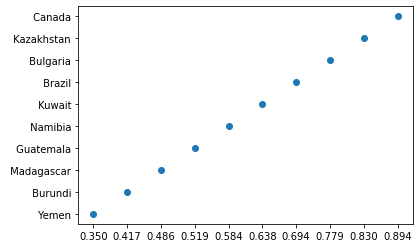

In [154]:
sample = education.sample(10).sort_values(by = 2019, ascending = True)
plt.scatter(sample[2019], sample.country)

## Worldbank data

The rest of our data comes from Worldbank's database.

In [158]:
cpi = pd.read_csv("https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/time_on_vertical_1996-2020/cpi_base2010.csv")
cpi = pd.DataFrame(cpi)

nom_gdp = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/time_on_vertical_1996-2020/nom_gdp.csv')
nom_gdp = pd.DataFrame(nom_gdp)

work_pop = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/time_on_vertical_1996-2020/work_pop.csv')
work_pop = pd.DataFrame(work_pop)

pop_growth = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/time_on_vertical_1996-2020/pop_growth.csv')
pop_growth = pd.DataFrame(pop_growth)

gdp_growth = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/time_on_vertical_1996-2020/gdp_growth.csv')
gdp_growth = pd.DataFrame(gdp_growth)

nom_capital_formation = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/time_on_vertical_1996-2020/nom_capital_formation.csv')
nom_capital_formation = pd.DataFrame(nom_capital_formation)

pop = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/time_on_vertical_1996-2020/pop.csv')
pop = pd.DataFrame(pop)

kgdp = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/time_on_vertical_1996-2020/k%25gdp.csv')
kgdp = pd.DataFrame(kgdp)

# import Penn World Table dataset

pwt = pd.read_excel('https://github.com/iatrogenic/Solow-TPROG/blob/main/data/data_PWT/pwt100.xlsx?raw=true', sheet_name = 'Data')
pwt = pd.DataFrame(pwt)

# education data is already imported on the previous section but perhaps should be reshaped so as to match
# the data imported above

In [160]:
# create a dataframe with World Bank data

df1 = pd.concat([cpi, nom_gdp, gdp_growth, work_pop, pop_growth, nom_capital_formation, pop, kgdp], axis = 1) # merge dataframes
df1 = df1.loc[:,~df1.columns.duplicated()] # remove duplicate columns
df1 = df1.dropna()
df1.reset_index(drop = True)

# delete two unecessary columns
del df1['Country Name']
del df1['Time Code']

# rename columns
df1.rename(columns = {'Country Code': 'country_code'}, inplace = True)
df1.rename(columns = {'Time': 'year'}, inplace = True)
df1.rename(columns = {'Consumer price index (2010 = 100) [FP.CPI.TOTL]': 'cpi'}, inplace = True)
df1.rename(columns = {'GDP (current US$) [NY.GDP.MKTP.CD]': 'nom_gdp'}, inplace = True)
df1.rename(columns = {'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]': 'gdp_growth'}, inplace = True)
df1.rename(columns = {'Population ages 15-64, total [SP.POP.1564.TO]': 'work_pop'}, inplace = True)
df1.rename(columns = {'Population growth (annual %) [SP.POP.GROW]': 'pop_growth'}, inplace = True)
df1.rename(columns = {'Gross capital formation (current US$) [NE.GDI.TOTL.CD]': 'nom_capital_formation'}, inplace = True)
df1.rename(columns = {'Population, total [SP.POP.TOTL]': 'pop'}, inplace = True)
df1.rename(columns = {'Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS]': 'kgdp'}, inplace = True)

# remove rows for years before 2000 and after 2018
df1 = df1[df1['year'] > 1999]
df1 = df1[df1['year'] < 2019]

# convert to numeric
#print(df1.dtypes)
df1['cpi'] = pd.to_numeric(df1['cpi'], errors='coerce')
df1['nom_gdp'] = pd.to_numeric(df1['nom_gdp'], errors='coerce')
df1['gdp_growth'] = pd.to_numeric(df1['gdp_growth'], errors='coerce')
df1['work_pop'] = pd.to_numeric(df1['work_pop'], errors='coerce')
df1['pop_growth'] = pd.to_numeric(df1['pop_growth'], errors='coerce')
df1['nom_capital_formation'] = pd.to_numeric(df1['nom_capital_formation'], errors='coerce')
df1['pop'] = pd.to_numeric(df1['pop'], errors='coerce')
df1['kgdp'] = pd.to_numeric(df1['kgdp'], errors='coerce')
#print(df1.dtypes)

#print(df1)

In [161]:
# create a dataframe with Penn World dataset

df2 = pwt[['countrycode', 'year', 'cn', 'labsh', 'delta', 'rgdpna', 'rnna']] # keep columns we need

# rename columns
df2.rename(columns = {'countrycode': 'country_code'}, inplace = True)
df2.rename(columns = {'cn': 'nom_capital_stock'}, inplace = True)
df2.rename(columns = {'labsh': 'labour_share_income'}, inplace = True)
df2.rename(columns = {'rgdpna': 'real_y'}, inplace = True)
df2.rename(columns = {'rnna': 'real_k'}, inplace = True)

# remove rows for years before 2000 and after 2018
df2 = df2[df2['year'] > 1999]
df2 = df2[df2['year'] < 2019]

#print(df1.dtypes) # already all numeric

#print(df2)

/Users/lack/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [163]:
# merge dataframes containing data from World Bank (df1) and Penn World Table (df2)

df = df1.merge(df2)
df = df.dropna()
df

# still necessary to merge with education

,country_code,year,cpi,nom_gdp,gdp_growth,work_pop,pop_growth,nom_capital_formation,pop,kgdp,nom_capital_stock,labour_share_income,delta,real_y,real_k
38,AGO,2000.0,2.909082,9.129635e+09,3.054624,8235987.0,3.277215,2.783920e+09,16395477.0,30.493219,343557.875000,0.284385,0.040218,81636.476562,862813.937500
39,AGO,2001.0,7.347208,8.936064e+09,4.205999,8513768.0,3.301174,2.724893e+09,16945753.0,30.493219,345280.343750,0.284385,0.039816,84199.867188,863955.250000
40,AGO,2002.0,15.348130,1.528559e+10,13.665687,8811564.0,3.329262,4.661063e+09,17519418.0,30.493173,348801.593750,0.284385,0.039587,96434.101562,867976.312500
41,AGO,2003.0,30.423699,1.781271e+10,2.989850,9130222.0,3.378794,5.424167e+09,18121477.0,30.451111,356889.250000,0.291653,0.039633,99317.335938,876801.500000
42,AGO,2004.0,43.670818,2.355205e+10,10.952862,9470294.0,3.452988,7.276093e+09,18758138.0,30.893669,368675.781250,0.275553,0.040158,110195.656250,892691.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,ZWE,2014.0,108.859485,1.949552e+10,2.376929,7430927.0,1.754741,1.879217e+09,13586710.0,9.639224,57715.582031,0.533381,0.050507,41273.582031,63399.503906
3416,ZWE,2015.0,106.213145,1.996312e+10,1.779873,7543272.0,1.663694,2.003427e+09,13814642.0,10.035640,61790.628906,0.533381,0.052084,42008.199219,64916.476562
3417,ZWE,2016.0,104.573565,2.054868e+10,0.755869,7642765.0,1.549294,2.026381e+09,14030338.0,9.861371,64844.191406,0.533381,0.053471,42325.726562,66257.859375
3418,ZWE,2017.0,105.508414,1.901533e+10,4.699400,7759792.0,1.459406,1.706119e+09,14236599.0,8.972336,67627.562500,0.533381,0.054693,44316.742188,67627.562500


In [174]:
# data transformation & creation

# create: inflation-adjusted gdp and capital stock
df['real_gdp'] = df['nom_gdp'] / (df['cpi'] / 100)
df['real_capital_formation'] = df['nom_capital_formation'] / (df['cpi'] / 100)

# create: capital share of income
df['capital_share_income'] = 1 - df['labour_share_income']

# adjust units of real capital stock
#df['real_capital_stock'] = df['real_capital_stock'] * 1000000

# adjust units of gdp growth
df['gdp_growth'] = df['gdp_growth'] / 100

# adjust units of population growth
df['pop_growth'] = df['pop_growth']

# adjust units
df['work_pop'] = df['work_pop'] / 1000000

# adjust unit
df['real_y'] = df['real_y'] * 100

# adjust units
df['real_k'] = df['real_k'] * 100

# create: real gdp per working-age population (in millions of US dollars)
df['real_gdp_per_work_pop'] = df['real_gdp'] / df['work_pop']

# create: real capital stock's share of real gdp (savings)
#df['savings'] =  (df['real_capital_formation'] / df['real_gdp']) / 100
df['savings'] = df['kgdp'] / 100

df

# variables to scale: 

# nom_gdp
# nom_capital_formation
# pop
# nom_capital_stock
# real_y
# real_k
# real_gdp
# real_capital_formation
# real_gdp_per_work_pop

normalized_df = df.copy()
normalized_df['nom_gdp'] = df['nom_gdp']/df['nom_gdp'].max()

normalized_df
# any daat transformation here

,country_code,year,cpi,nom_gdp,gdp_growth,work_pop,pop_growth,nom_capital_formation,pop,kgdp,...,labour_share_income,delta,real_y,real_k,real_gdp,real_capital_formation,capital_share_income,real_gdp_per_work_pop,savings,(n+g+delta)
38,AGO,2000.0,2.909082,0.000443,3.054624e-12,8.235987e-30,3.277215,2.783920e+09,16395477.0,30.493219,...,0.284385,0.040218,8.163648e+16,8.628139e+17,3.138321e+11,9.569752e+10,0.715615,3.810498e+40,0.304932,3.359758
39,AGO,2001.0,7.347208,0.000434,4.205999e-12,8.513768e-30,3.301174,2.724893e+09,16945753.0,30.493219,...,0.284385,0.039816,8.419987e+16,8.639552e+17,1.216253e+11,3.708747e+10,0.715615,1.428572e+40,0.304932,3.383717
40,AGO,2002.0,15.348130,0.000742,1.366569e-11,8.811564e-30,3.329262,4.661063e+09,17519418.0,30.493173,...,0.284385,0.039587,9.643410e+16,8.679763e+17,9.959256e+10,3.036893e+10,0.715615,1.130248e+40,0.304932,3.411805
41,AGO,2003.0,30.423699,0.000864,2.989850e-12,9.130222e-30,3.378794,5.424167e+09,18121477.0,30.451111,...,0.291653,0.039633,9.931734e+16,8.768015e+17,5.854878e+10,1.782875e+10,0.708347,6.412635e+39,0.304511,3.461337
42,AGO,2004.0,43.670818,0.001143,1.095286e-11,9.470294e-30,3.452988,7.276093e+09,18758138.0,30.893669,...,0.275553,0.040158,1.101957e+17,8.926912e+17,5.393087e+10,1.666122e+10,0.724447,5.694741e+39,0.308937,3.535531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,ZWE,2014.0,108.859485,0.000946,2.376929e-12,7.430927e-30,1.754741,1.879217e+09,13586710.0,9.639224,...,0.533381,0.050507,4.127358e+16,6.339950e+16,1.790888e+10,1.726278e+09,0.466619,2.410047e+39,0.096392,1.837284
3416,ZWE,2015.0,106.213145,0.000969,1.779873e-12,7.543272e-30,1.663694,2.003427e+09,13814642.0,10.035640,...,0.533381,0.052084,4.200820e+16,6.491648e+16,1.879534e+10,1.886233e+09,0.466619,2.491669e+39,0.100356,1.746236
3417,ZWE,2016.0,104.573565,0.000997,7.558693e-13,7.642765e-30,1.549294,2.026381e+09,14030338.0,9.861371,...,0.533381,0.053471,4.232573e+16,6.625786e+16,1.964997e+10,1.937757e+09,0.466619,2.571056e+39,0.098614,1.631837
3418,ZWE,2017.0,105.508414,0.000923,4.699400e-12,7.759792e-30,1.459406,1.706119e+09,14236599.0,8.972336,...,0.533381,0.054693,4.431674e+16,6.762756e+16,1.802257e+10,1.617046e+09,0.466619,2.322558e+39,0.089723,1.541949


In [165]:
# compute (g + delta) & create new variable (n + g + delta)

# compute g & delta
g_delta = df.groupby(['country_code'])['gdp_growth', 'delta'].agg('mean')
g = g_delta['gdp_growth'].mean()
delta = g_delta['delta'].mean()
print(g)
print(delta)

# create: (n + g + delta)
df['(n+g+delta)'] = df['pop_growth'] + g + delta # original paper assumes that g+delta = 0.05
df

0.03894877924557681
0.04359419377176531


<ipython-input-165-f5e0a4233331>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g_delta = df.groupby(['country_code'])['gdp_growth', 'delta'].agg('mean')


,country_code,year,cpi,nom_gdp,gdp_growth,work_pop,pop_growth,nom_capital_formation,pop,kgdp,...,labour_share_income,delta,real_y,real_k,real_gdp,real_capital_formation,capital_share_income,real_gdp_per_work_pop,savings,(n+g+delta)
38,AGO,2000.0,2.909082,9.129635e+09,0.030546,8.235987,3.277215,2.783920e+09,16395477.0,30.493219,...,0.284385,0.040218,8.163648e+06,8.628139e+07,3.138321e+11,9.569752e+10,0.715615,3.810498e+10,0.304932,3.359758
39,AGO,2001.0,7.347208,8.936064e+09,0.042060,8.513768,3.301174,2.724893e+09,16945753.0,30.493219,...,0.284385,0.039816,8.419987e+06,8.639552e+07,1.216253e+11,3.708747e+10,0.715615,1.428572e+10,0.304932,3.383717
40,AGO,2002.0,15.348130,1.528559e+10,0.136657,8.811564,3.329262,4.661063e+09,17519418.0,30.493173,...,0.284385,0.039587,9.643410e+06,8.679763e+07,9.959256e+10,3.036893e+10,0.715615,1.130248e+10,0.304932,3.411805
41,AGO,2003.0,30.423699,1.781271e+10,0.029899,9.130222,3.378794,5.424167e+09,18121477.0,30.451111,...,0.291653,0.039633,9.931734e+06,8.768015e+07,5.854878e+10,1.782875e+10,0.708347,6.412635e+09,0.304511,3.461337
42,AGO,2004.0,43.670818,2.355205e+10,0.109529,9.470294,3.452988,7.276093e+09,18758138.0,30.893669,...,0.275553,0.040158,1.101957e+07,8.926912e+07,5.393087e+10,1.666122e+10,0.724447,5.694741e+09,0.308937,3.535531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,ZWE,2014.0,108.859485,1.949552e+10,0.023769,7.430927,1.754741,1.879217e+09,13586710.0,9.639224,...,0.533381,0.050507,4.127358e+06,6.339950e+06,1.790888e+10,1.726278e+09,0.466619,2.410047e+09,0.096392,1.837284
3416,ZWE,2015.0,106.213145,1.996312e+10,0.017799,7.543272,1.663694,2.003427e+09,13814642.0,10.035640,...,0.533381,0.052084,4.200820e+06,6.491648e+06,1.879534e+10,1.886233e+09,0.466619,2.491669e+09,0.100356,1.746236
3417,ZWE,2016.0,104.573565,2.054868e+10,0.007559,7.642765,1.549294,2.026381e+09,14030338.0,9.861371,...,0.533381,0.053471,4.232573e+06,6.625786e+06,1.964997e+10,1.937757e+09,0.466619,2.571056e+09,0.098614,1.631837
3418,ZWE,2017.0,105.508414,1.901533e+10,0.046994,7.759792,1.459406,1.706119e+09,14236599.0,8.972336,...,0.533381,0.054693,4.431674e+06,6.762756e+06,1.802257e+10,1.617046e+09,0.466619,2.322558e+09,0.089723,1.541949


In [166]:
# collapse regressor values in df to their arithmetic means

df_regression = df.groupby(['country_code'])['savings', '(n+g+delta)'].agg('mean')
df_regression


### collapse arthm. mean here

<ipython-input-166-a2c9e2767d52>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_regression = df.groupby(['country_code'])['savings', '(n+g+delta)'].agg('mean')


,savings,(n+g+delta)
country_code,,
ABW,0.273666,1.019516
AGO,0.286791,3.575170
ARM,0.293456,-0.156713
AUS,0.264334,1.543840
AUT,0.241518,0.613407
...,...,...
USA,0.212073,0.914701
VEN,0.251919,1.477733
ZAF,0.192099,1.477305


In [167]:
# compute real gdp per working age population in last year of sample (2018)
# and attach to df_regression

df_2018 = df[df.year == 2018]
df_2018 = df_2018.set_index('country_code', drop = True)
df_2018['real_gdp_per_work_pop_2018'] = df_2018['real_gdp_per_work_pop']
#df_2018['country_code'].astype(str)
#df_regression['country_code'].astype(str)

df_regression = df_regression.merge(df_2018['real_gdp_per_work_pop_2018'], on = 'country_code')
df_regression

## dataframes for the regression

,savings,(n+g+delta),real_gdp_per_work_pop_2018
country_code,,,
AGO,0.286791,3.575170,1.994231e+09
ARM,0.293456,-0.156713,4.866108e+09
AUS,0.264334,1.543840,7.466734e+10
AUT,0.241518,0.613407,6.634159e+10
AZE,0.278719,1.236548,4.401152e+09
...,...,...,...
URY,0.183624,0.302665,1.539820e+10
USA,0.212073,0.914701,8.363004e+10
ZAF,0.192099,1.477305,6.364271e+09


In [168]:
##########################

#    estimate model   
#######################

# set up regressors and regressand, then estimate model

X = df_regression[['savings', '(n+g+delta)']] # regressors
np.log(X) # natural log of regressors
X = sm.add_constant(X) # add a constant to ensure mean of residuals = 0
Y = df_regression['real_gdp_per_work_pop_2018'] # regressand
np.log(Y) # natural log of regressand

# estimate OLS
# compute heteroskedasticity-robust standard errors ('HC3')
model = sm.OLS(Y,X).fit(cov_type = 'HC3')

model.summary()
# result.bse
# result.t_test(...)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     real_gdp_per_work_pop_2018   R-squared:                       0.015
Model:                                    OLS   Adj. R-squared:                 -0.001
Method:                         Least Squares   F-statistic:                    0.4598
Date:                        Sat, 27 Nov 2021   Prob (F-statistic):              0.633
Time:                                18:33:25   Log-Likelihood:                -3169.7
No. Observations:                         124   AIC:                             6345.
Df Residuals:                             121   BIC:                             6354.
Df Model:                                   2                                         
Covariance Type:                          HC3                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.545e+10   1.27e+10      2.798      0.005    1.06e+10    6.03e+10
savings     -3.269e+10   4.26e+10     -0.768      0.442   -1.16e+11    5.07e+10
(n+g+delta) -2.311e+09   2.86e+09     -0.807      0.419   -7.92e+09     3.3e+09
==============================================================================
Omnibus:                       48.297   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.818
Skew:                           1.724   Prob(JB):                     1.56e-21
Kurtosis:                       5.580   Cond. No.                         39.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

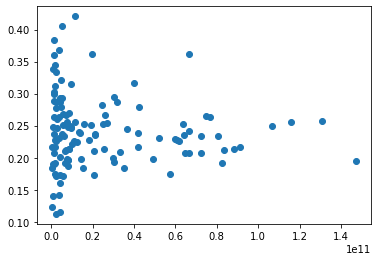

In [169]:
dx = pd.DataFrame(X)
dy = pd.DataFrame(Y)

fig, ax = plt.subplots()
ax.scatter(dy['real_gdp_per_work_pop_2018'], dx['savings'])
#ax.scatter(dy['real_gdp_per_work_pop_2018'], dx['(n+g+delta)'])